# Tutorial Exercises: $t$-test and non-parametric equivalents

Here are some more exercises on comparing means using the t-test and non-parametric equivalents

These exercises are very similar to what you did in the t-test and Mann-Whitney/Wilcoxon examples so in most cases you will be able to copy and adapt code and text from the examples.

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas
import seaborn as sns

## 1. Whose peaches are heavier?

<img src="https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/images/peaches.png" width=30% alt="There should be a picture of some peaches here" >


Mr Robinson’s juice factory buys peaches from farmers by the tray. Each tray contains 50 peaches. Farmer McDonald claims that this is unfair as his peaches are juicier and therefore weigh more than the peaches of his rival, Mr McGregor.

Mr Robinson weighs eight trays of Farmer McDonald’s peaches and 8 trays of Mr McGregor’s peaches.
The weights, in kilograms are given in the file peaches.csv found at https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/data/peaches.csv

* Throughout the coures you have been loading files directly from my Github repository using `pandas.read_csv` using ready made code - below you will need to copy and modify an example to read the file peaches.csv from that same repository

Investigate whether McDonald's claim is justified by testing for a difference in weight between McDonald and McGregor's peaches. Use both a parametric and non-parametric test.

a) Load the data into a Pandas dataframe

In [10]:
#Your code here to load the data - check previous examples if unsure how to do this
data = pandas.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/data/peaches.csv')
data

,McGregor,MacDonald
0,7.867,8.289
1,7.637,7.972
2,7.652,8.237
3,7.772,7.789
4,7.510,7.345
5,7.743,7.861
6,7.356,7.779
7,7.944,7.974


b) Plot the data and comment.

A Kernel desity estimate plot (to show the distribution) and rug plot (to show individual data points) would be a good choice here. You should comment on whether the data appear to be Normally distriubted and hence the suitability of the t-test.

<Axes: ylabel='Density'>

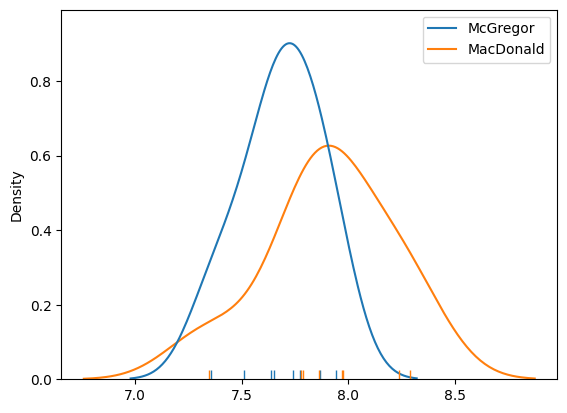

In [9]:
sns.kdeplot(data)# your text here to plot the data
sns.rugplot(data)

d) We can assume (based on the Central Limit Theorem) that these data points are normally distributed.

This is because individual datapoints are the weight of each tray containing 50 peaches, therefore representing average peach weight and should be normally distributed.

e) Conduct a t-test to test Farmer McDonald's claim

* State your hypotheses
* State relevant descriptive statistics
* Carry out the test using the built in function from <tt>scipy.stats</tt> with appropriate option choices
* State your conclusions

Ho: peaches from MacDonald's farm are on average not heavier than McGregor's.

Ha: peaches from MacDonald's farm are on average heavier than McGregor's.

In [24]:
stats.ttest_ind(data['MacDonald'], data['McGregor'], alternative='greater')



TtestResult(statistic=1.7749776811588107, pvalue=0.04881876713074563, df=14.0)

Conclusion: we may reject the null hypothesis with p<0.05, suggesting that MacDonald's farm does produce heavier peaches on average.

f) Conduct an appropriate non-parametric test of Farmer McDonald's claim

* State your hypotheses
* State relevant descriptive statistics
* Carry out the test using the ubilt in function from <tt>scipy.stats</tt> with appropriate option choices
* State your conclusions

Hypotheses:

Ho: the median peach basket from MacDonald's farm is not heavier than McGregor's.

Ha: the median peach basket form MacDonald's farm is heavier than McGregor's.

In [26]:
stats.mannwhitneyu(data['MacDonald'], data['McGregor'], alternative='greater')

MannwhitneyuResult(statistic=50.0, pvalue=0.032478632478632474)

Having chosen the Mann Whintey-U test, as it is appropriate in a greater number of cases, we again may reject the null hypothesis with p<0.05.

That is, the median basket of peaches from MacDonald's farm is heavier than the median basket of peaches from McGregor's farm.

## 2. IQ and vitamins

<img src="https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/images/vitamins.jpg" width=50% alt="There should be a picture of some vitamin pills here" >

The VitalVit company claim that after taking their VitalVit supplement, IQ is increased.

They run a trial in which 22 participants complete a baseline IQ test, then take VitalVit for six weeks, then complete another IQ test.

The participants' scores can be found in the data file VitalVit.csv at https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/data/vitalVit.csv

a. What kind of design is this.

Repeated measures design.

b. What are the advantages and possible disadvantages of this type of design? Should the company have done something different or additional to rule out confounding factors?

One advantage is being able to track individuals pre- and post intervention.
However, there is a risk of practice effects on IQ tests which may be a confound in the intervention.

A control group should therefore be introduced to make sure that there is no confound in repeated testing within 6 weeks.

A statistical test could then be done to check whether the difference in the intervention and control group was significant.

c. Load the data into a Pandas dataframe

In [28]:
vitamins = pandas.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/data/vitalVit.csv')#Your code here to load the data - check previous examples if unsure how to do this
vitamins

,ID_code,before,after
0,688870,82.596,83.437
1,723650,117.200,119.810
2,445960,85.861,83.976
3,708780,125.640,127.680
4,109960,96.751,99.103
5,968530,105.680,106.890
6,164930,142.410,145.550
7,744410,109.650,109.320
8,499380,128.210,125.110
9,290560,84.773,87.249



d. Plot the data and comment.
A scatterplot would be a good choice as these are paired data.
You could add the line of equality (line x=y) to the graph so we can see whether most people score higer on the IQ test before or after taking VitalVit

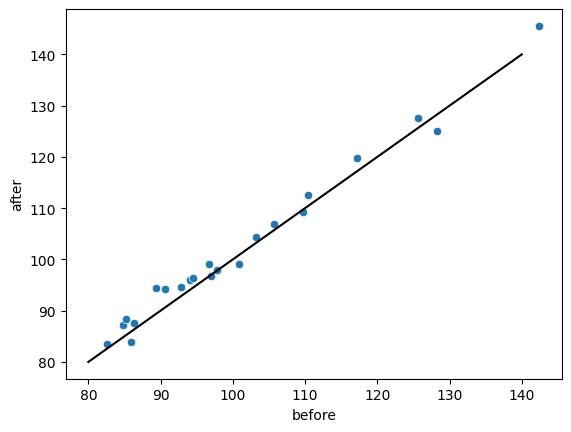

In [49]:
sns.scatterplot(vitamins, x='before', y ='after')# Your code here for a scatter plot.
plt.plot([80,140],[80,140],'k')


IQ scores are normally distributed by design (the tests are designed to yield a normal distribution of scores). Therefore we should be able to use a t-test to compare the scores from before and after taking VitalVit. We will carry out both the (parametric) t-test and a suitable non-parametric test

e) Conduct a t-test to test VitalVit's claim

* State your hypotheses
* State relevant descriptive statistics
* Carry out the test using the ubilt in function from <tt>scipy.stats</tt> with appropriate option choices
* State your conclusions

Hypotheses:

Ho: IQ scores are not greater on average after taking vitamins.

Ha: IQ scoresm are on average greater after taking vitamins.

In [37]:
stats.ttest_rel(vitamins['after'],vitamins['before'],alternative='greater')

TtestResult(statistic=3.247037547947646, pvalue=0.0019289530228459733, df=21)

Conclusions: we may reject our null-hypothesis with p<0.002, suggesting that IQ scores were on average greater when tested again after 6 weeks while taking vitamins.

f) Conduct a suitable non-parametric test to test VitalVit's claim

* State your hypotheses
* State relevant descriptive statistics
* Carry out the test using the ubilt in function from <tt>scipy.stats</tt> with appropriate option choices
* State your conclusions

Hypotheses:

Ho: the median IQ score is not greater after taking vitamins.

Ha: the median IQ score is greater after taking vitamins.

In [51]:
stats.wilcoxon(vitamins['after'],vitamins['before'], alternative='greater')

WilcoxonResult(statistic=208.0, pvalue=0.003324747085571289)

Wilcoxon is appropriate as a non-parametric replacement for paired t-tests.

Here we again reject the null hypothesis, suggesting that the median IQ score is greater after taking vitamins.

## 3. Who has the tallest students?

A student from Lonsdale college claims that Lonsdale students are taller than students from Beaufort college.

Heights of 30 randomly selected male undergraduates from each college are found in the file heightsCollege.csv found at https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/data/heightsCollege.csv

Test the student's hypothesis using a t-test (this is justified as heights are generally normally distributed) and write up your report as if for a scientific publication. Your report should include the following elements:

<ul>
    <li> A plot of the data to show the data distribution
    <li> The relevant descriptive statistics
    <li> The results of the t-test
    <li> A conclusion
</ul>

You can use the write-up sections of the t-test example notebooks as a model

In [53]:
students = pandas.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/data/heightsCollege.csv')
#Your code here to load the data - check previous examples if unsure how to do this

students

,lonsdale,beaufort
0,183.76,182.64
1,192.84,178.86
2,164.19,178.76
3,186.04,173.41
4,182.23,186.13
5,170.85,178.07
6,176.96,174.00
7,182.40,188.46
8,205.05,177.43
9,199.39,174.88


<Axes: ylabel='Density'>

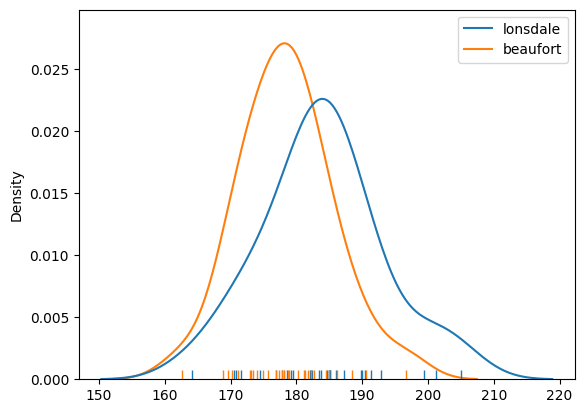

In [55]:
sns.kdeplot(students)
sns.rugplot(students)

We may expect heights to be normally distributed, therefore we perform a one-sided independent sample t-test with the following hypotheses:

Ho: the average student is not taller in lonsdale than in beaufort.

Ha: the average student is taller in lonsdale than in beaufort.

In [57]:
stats.ttest_ind(students['lonsdale'],students['beaufort'], alternative='greater')

TtestResult(statistic=2.5783308721106657, pvalue=0.006244458161479009, df=58.0)

Conclusion: we may reject our null hypothesis with p<0.007, suggesting that the average student is taller in lonsdale than in beaufort.